In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
np.set_printoptions(suppress=True) 
        ### not xEyy format(science float format)

In [2]:
data = np.loadtxt('ex2data1.txt')
data[1:10,:]

array([[30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ]])

In [3]:
X = data[:, (0,1)]
y = data[:, 2].reshape(-1, 1)

In [4]:
def plotData(X, y):
    plt.plot(
        X[np.where(y==0),0].T, X[np.where(y==0), 1].T, 'bo');
    plt.plot(
        X[np.where(y==1),0].T, X[np.where(y==1), 1].T, 'g^');

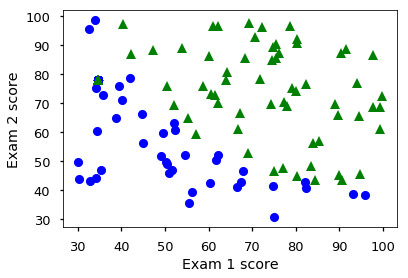

In [5]:
%matplotlib inline
plotData(X, y)
plt.xlabel('Exam 1 score');
plt.ylabel('Exam 2 score');
# plt.legend(['Admitted', 'Not admitted']);

In [6]:
m, n = X.shape
XX = np.append(np.ones([m,1]), X, axis=1)
initial_theta = np.zeros([n+1, 1])

In [7]:
def sigmoid(z):
    g = 1.0/(1.0+np.exp(-z))
    return g

def costFunction(theta, X, y):
    m = len(y)
    hx = sigmoid(np.dot(X, theta))
    J1 = -y * np.log(hx)
    J2 = (1.0 - y) * np.log(1.0 - hx)
    J = 1.0 / m * np.sum( J1 - J2 )
    
    grad = 1.0 / m * np.sum( (hx - y) * X , axis = 0)
    grad = grad.reshape(-1, 1)
    
    return J, grad

In [8]:
cost, grad = costFunction( initial_theta, XX, y)
print cost ### 0.693
print grad ### -0.100, -12.0092, -11.2628

0.6931471805599453
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [9]:
test_theta = [[-24], [0.2], [0.2]]
cost, grad = costFunction(test_theta, XX, y)
print cost ### 0.218
print grad ### 0.043, 2.566, 2.647

0.21833019382659785
[[0.04290299]
 [2.56623412]
 [2.64679737]]


In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    j_his = np.zeros([num_iters, 1])
    for iter in range(num_iters):
        j_his[iter], grad = costFunction(theta, X, y)
        theta -= alpha * grad
    return theta, j_his

In [11]:
##############################
##
##  Something is wrong!!!
##
##############################
alpha = 0.001
num_iters = 20
m, n = X.shape

### initial_theta = np.zeros([n+1, 1]).reshape(-1,1)  
        ### fall into local minimum
initial_theta = np.array([-25, 0.3, 0.3]).reshape(-1,1)

theta, j_his = gradientDescent(XX, y, initial_theta, alpha, num_iters)
print j_his[-1] ### 0.203
print theta     ### -25.161, 0.206, 0.201

[0.20352841]
[[-25.00171254]
 [  0.2041154 ]
 [  0.20105619]]


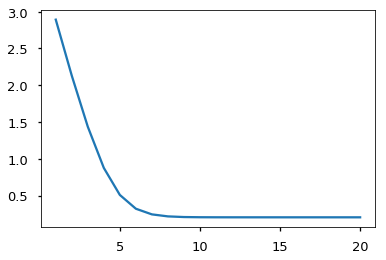

In [12]:
plt.plot(range(1, len(j_his)+1), j_his);

In [13]:
### use optimal method

from scipy.optimize import fmin_ncg

def costJ(theta, *args):
    theta = theta.reshape(-1,1)
    X, y = args
    m = len(y)
    hx = sigmoid(np.dot(X, theta))
    J1 = -y * np.log(hx)
    J2 = (1.0 - y) * np.log(1.0 - hx)
    J = 1.0 / m * np.sum( J1 - J2 )
    return J

def gradJ(theta, *args):
    theta = theta.reshape(-1,1)
    X, y = args
    m = len(y)
    hx = sigmoid(np.dot(X, theta))
    grad = 1.0 / m * np.sum( (hx - y) * X , axis = 0)
    return grad
    
def find_min(X, y, theta):
    cost = 0
    ncg = fmin_ncg(costJ, theta, fprime=gradJ, args=(X, y), 
                   full_output = True)
    return ncg[0], ncg[1]

In [14]:
#######
## use find_min
m, n = X.shape
initial_theta = np.zeros([n+1, 1]).reshape(-1,1)
theta, cost = find_min(XX, y, initial_theta)
theta = theta.reshape(-1, 1)
print
print cost  ### 0.203
print theta ### -25.161, 0.206, 0.201

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 29
         Function evaluations: 74
         Gradient evaluations: 254
         Hessian evaluations: 0

0.203497701847
[[-25.16002384]
 [  0.2062215 ]
 [  0.20146073]]


In [15]:
def plotDecisionBoundary(theta, XX, y):
    plotData(XX[:, (1,2)], y)
    plot_x = [np.min(XX[:, 1])-2, np.max(XX[:,1])+2]
    plot_y = (-1.0/theta[2]) * (theta[1]*plot_x + theta[0])
    plt.plot(plot_x, plot_y, 'r')

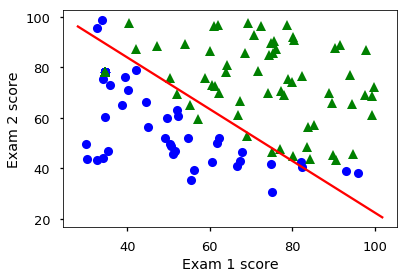

In [16]:
plotDecisionBoundary(theta, XX, y)
plt.xlabel('Exam 1 score');
plt.ylabel('Exam 2 score');

In [17]:
prob = sigmoid(np.dot([1, 45, 85] , theta))
print prob ### 0.775 +- 0.002

[0.77627787]


In [18]:
def predict(theta, X):
    p = sigmoid(np.dot(X, theta))
    p = (p>=0.5).astype(int)
    return p

In [19]:
p = predict(theta, XX)
correct = (np.abs(p-y)<0.1).astype(int)

print np.mean(correct)*100  ### 89.0 %

89.0


In [20]:
data = np.loadtxt('ex2data2.txt')
X = data[:, (0,1)]
y = data[:, 2].reshape(-1,1)

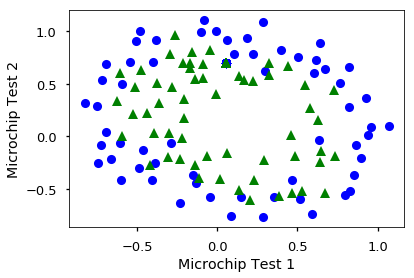

In [21]:
plotData(X, y)
plt.xlabel('Microchip Test 1');
plt.ylabel('Microchip Test 2');

In [22]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones([len(X1), 1])
    for i in range(1, degree+1):
        for j in range(0, i+1):
            col = (X1**(i-j))*(X2**(j))
            out = np.append(out, col, axis=1)
    return out

In [23]:
def costFunctionReg(theta, X, y, lamb):
    m = len(y)
    
    hx = sigmoid(np.dot(X, theta))
    J1 = - y * np.log(hx)
    J2 = (1.0 - y) * np.log(1.0 - hx)
    theta_but0 = theta[1:]
    J3 = lamb / (2.0 * m) * np.sum(theta_but0**2)
    J = 1.0 / m * np.sum(J1 - J2)
    J = J + J3
    
    g1 = (lamb/m * theta).reshape(-1, 1)
    g1[0] = 0
    grad = 1.0 / m * np.sum((hx - y) * X, axis=0)
    grad = grad.reshape(-1, 1) + g1
    
    return J, grad

In [24]:
XX = mapFeature(X[:, 0].reshape(-1,1), X[:, 1].reshape(-1,1))
initial_theta = np.zeros([XX.shape[1], 1])
lamb = 1.0
cost, grad = costFunctionReg(initial_theta, XX, y, lamb)
print cost           ### 0.693
print grad[0:5]      ### 0.0085, 0.0188, 0.0001, 0.0503, 0.0115

0.6931471805599454
[[0.00847458]
 [0.01878809]
 [0.00007777]
 [0.05034464]
 [0.01150133]]


In [25]:
### all ones theta and lambda = 10
test_theta = np.ones([XX.shape[1], 1])
lamb = 10.0
cost, grad = costFunctionReg(test_theta, XX, y, lamb)
print cost      ### 3.16
print grad[0:5] ### 0.3460, 0.1614, 0.1948, 0.2269, 0.0922

3.1645093316150095
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


In [26]:
def costJReg(theta, *args):
    theta = theta.reshape(-1,1)
    X, y, lamb = args
    
    hx = sigmoid(np.dot(X, theta))
    J1 = - y * np.log(hx)
    J2 = (1.0 - y) * np.log(1.0 - hx)
    theta_but0 = theta[1:]
    J3 = lamb / (2.0 * m) * np.sum(theta_but0**2)
    J = 1.0 / m * np.sum(J1 - J2)
    J = J + J3
    return J

def gradJReg(theta, *args):
    theta = theta.reshape(-1,1)
    X, y, lamb = args
    m = len(y)
    hx = sigmoid(np.dot(X, theta))
    
    g1 = (lamb/m * theta)
    g1[0] = 0
    grad = 1.0 / m * np.sum((hx - y) * X, axis=0)
    grad = grad + g1.flatten()
    return grad
    
def find_min_reg(X, y, theta, lamb):
    ncg = fmin_ncg(costJReg, theta, fprime=gradJReg, args=(X, y, lamb), 
                   full_output=True)
    return ncg[0], ncg[1]


In [27]:
initial_theta = np.zeros([XX.shape[1], 1])
lamb = 1.0
theta, cost = find_min_reg(XX, y, initial_theta, lamb)
print
print cost
print theta

Optimization terminated successfully.
         Current function value: 0.624223
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 80
         Hessian evaluations: 0

0.624223221061
[ 1.2727385   0.62527196  1.18108974 -2.01995941 -0.91742289 -1.43166489
  0.12400699 -0.36553405 -0.3572395  -0.17513044 -1.45815587 -0.05098955
 -0.61555482 -0.27470689 -1.1928151  -0.24218804 -0.20600619 -0.04473086
 -0.27778445 -0.29537855 -0.45635822 -1.04320257  0.02777136 -0.29243118
  0.01556671 -0.32737972 -0.14388727 -0.92465297]


In [28]:
def mapFeatureScale(x1, x2):
    degree = 6
    out = np.ones([1, 1])
    for i in range(1, degree+1):
        for j in range(0, i+1):
            col = [[(x1**(i-j))*(x2**(j))]]
            out = np.append(out, col, axis=1)
    return out

def plotDecisionBoundaryReg(theta, XX, y):
    plotData(XX[:, (1,2)], y)
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros([len(u), len(v)])
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeatureScale(u[i], v[j]), theta)
    
    z = z.T  ### important to transpose z before calling contour
    
    ### plot z = 0
    plt.contour(u, v, z, [0], colors='r');

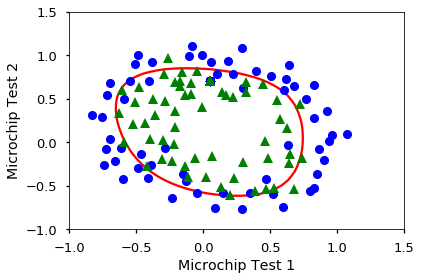

In [29]:
plotDecisionBoundaryReg(theta, XX, y)
plt.xlabel('Microchip Test 1');
plt.ylabel('Microchip Test 2');

In [30]:
p = predict(theta, XX).reshape(-1,1)
correct = (np.abs(p-y)<0.1).astype(int)

print np.mean(correct)*100  ### 83.1 %

83.05084745762711


In [32]:
########### optional

Optimization terminated successfully.
         Current function value: 0.624223
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 70
         Hessian evaluations: 0


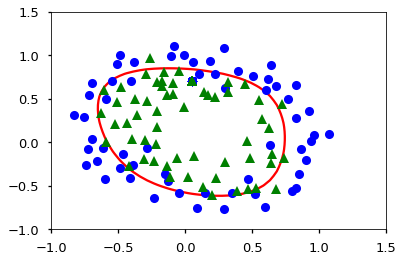

In [33]:
initial_theta = np.zeros([XX.shape[1], 1])
lamb = 1.0
theta, cost = find_min_reg(XX, y, initial_theta, lamb)
plotDecisionBoundaryReg(theta, XX, y)

         Current function value: 0.317770
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 1765
         Hessian evaluations: 0


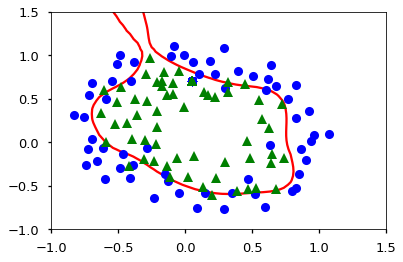

In [34]:
initial_theta = np.zeros([XX.shape[1], 1])
lamb = 0
theta, cost = find_min_reg(XX, y, initial_theta, lamb)
plotDecisionBoundaryReg(theta, XX, y)

Optimization terminated successfully.
         Current function value: 0.810051
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 18
         Hessian evaluations: 0


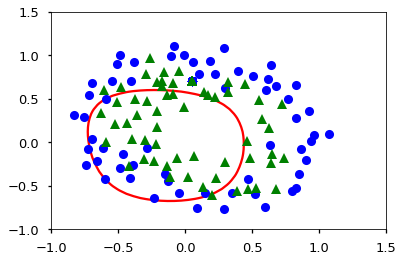

In [36]:
initial_theta = np.zeros([XX.shape[1], 1])
lamb = 100.0
theta, cost = find_min_reg(XX, y, initial_theta, lamb)
plotDecisionBoundaryReg(theta, XX, y)